Multiple linear gression model :
Suppose the design matrix $X$ has dimension $$n\times p$$, for observation i ,we have the model
$$h_{\theta}(x_{i})=\theta_{0}+\theta_{1}x_{1}+...+\theta_{p}x_{p}+\epsilon_{i}$$

where $$\theta_{i}$$ is the parameter in the model we want to optimize.

The corresponding cost function would be:
$$J(\mathcal{\theta})=\frac{1}{2n}\sum_{i=1}^{n}(\hat{h_{\theta}(x_{i})}-y_{i})$$,

where $\hat{h_{\theta}(x_{i})}$ is the estimated response and $y_{i}$ is the true value of the observed response.

By the least squre method, the BLUE of the parameter $\theta$ can be expressed by following matrix notation:

$$\hat{\theta}=(X^{T}X)^{-1}X^{T}Y$$

It follows that the estimated response is $$\hat{Y}=X\hat{\theta}=X(X^{T}X)^{-1}X^{T}Y$$

as long as there is no severe multi-colinearity, the estimator of $\theta$ would be the best linear unbiased estimator.

In real data, once we obtain the design matrix, we can get the estimator by the formula above (assume no severe multi-colinearity). If there is an ill-posed condition, ridge or lasso regression will be applied. The main idea is to add a penaltity term which reduces the variance but increase the bias a little bit. In real application, people will tune the parameter of the penalty term by minimizing the cross validation score.

But in this section, I will mainly focus on doing the linear regression from scratch.

In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from matplotlib.pyplot import rcParams

In [94]:
df = pd.read_csv('insurance.csv', header = 0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data preprocessing

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

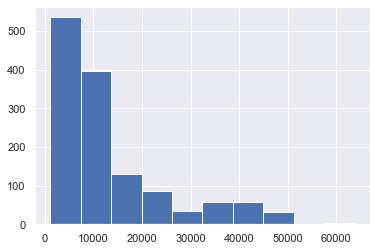

In [95]:
# Distribution of response:
plt.hist(df['charges'])

Since the response is right skewed, we will do the log transformation to satisfy the normal assumption in linear regression.

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <a list of 10 Patch objects>)

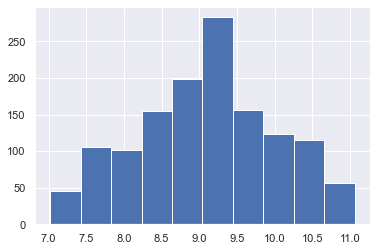

In [96]:
log_charge= np.log(df['charges'])
df['charges']=log_charge
plt.hist(log_charge)

Now the distribution looks normal. Next step is to transform the category data into dummy variable

In [97]:
dummysex=pd.get_dummies(df.sex, prefix='sex').iloc[:, 1:]
dummyregion=pd.get_dummies(df.region).iloc[:, 1:]
dummysmoke=pd.get_dummies(df.smoker,prefix='smoke').iloc[:, 1:]
#dummy.head(10)
data_new=pd.concat([df, dummysex,dummyregion,dummysmoke], axis=1)

data2=data_new.drop(['sex','region','smoker'],axis=1) #drop V0 since we only need V12
data2.head(10)

,age,bmi,children,charges,sex_male,northwest,southeast,southwest,smoke_yes
0,19,27.900,0,9.734176,0,0,0,1,1
1,18,33.770,1,7.453302,1,0,1,0,0
2,28,33.000,3,8.400538,1,0,1,0,0
3,33,22.705,0,9.998092,1,1,0,0,0
4,32,28.880,0,8.260197,1,1,0,0,0
5,31,25.740,0,8.231275,0,0,1,0,0
6,46,33.440,1,9.016827,0,0,1,0,0
7,37,27.740,3,8.893093,0,1,0,0,0
8,37,29.830,2,8.765054,1,0,0,0,0
9,60,25.840,0,10.272397,0,1,0,0,0


## Linear regression part

In [98]:
np.shape(data2)

(1338, 9)

In [100]:
Y=data2['charges'] #response

#design matrix
X=data2.drop(['charges'],axis=1) #
#add intercetp column
X['Intercept']=1
np.shape(X)


(1338, 9)

In [101]:
# estimator
from numpy.linalg import inv


beta= np.dot(np.dot(inv(np.dot(np.array(X).transpose(),np.array(X))),np.array(X).transpose()),Y.copy())

Y_hat= np.dot(np.array(X),beta)
Y_hat

array([ 9.48613738,  7.97393904,  8.51317053, ...,  7.98869309,
        7.97289075, 11.01937948])

##  Compare with the results from skicit learning package

In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept =False).fit(X.copy(), Y)
reg.coef_

array([ 0.03458164,  0.01337482,  0.10185685, -0.07541644, -0.06378756,
       -0.15719675, -0.12895222,  1.55432279,  7.03055809])

In [117]:
beta

array([ 0.03458164,  0.01337482,  0.10185685, -0.07541644, -0.06378756,
       -0.15719675, -0.12895222,  1.55432279,  7.03055809])

They are the same.

## R^2 determinant of coefficients

In [118]:
sum((Y_hat - Y.mean())**2)/sum((Y - Y.mean())**2)

0.7679477609588591

R^2 is about 77% which means that about 77% of the variance of response can be explained by our multiple linear regression

## Conclusion

Based on the R^2, multiple linear regression works will in this case. But we shoud note that we did the log transformation first, which is the critical part in regression since the statistical property heavily depends on the distribution of the response. 

Look at the estimated parameter, the coefficient of BMI is 0.013, which means that given other factors unchanged, the log medical cost will increase on average by 0.013 with the 1 unit increase of bmi.